In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [16]:
print (os.listdir())

['.ipynb_checkpoints', '1.PNG', '2.PNG', 'model', 'Procfile', 'README.md', 'requirements.txt', 'static', 'templates', 'Traffic_app.py', 'traffic_signal_recognition.ipynb', '__pycache__']


In [68]:
data = []
labels = []
classes = 43
cur_path = os.path.join('C:/Users/Rahul/Downloads/Traffic_Signs_WebApp-master','Train',str(i))

In [69]:
cur_path

'C:/Users/Rahul/Downloads/Traffic_Signs_WebApp-master\\Train\\42'

In [21]:
for i in range(classes):
    path = os.path.join('C:/Users/Rahul/Downloads/Traffic_Signs_WebApp-master','Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [22]:
data = np.array(data)
labels = np.array(labels)

In [28]:
os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

In [29]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [30]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [33]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [34]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 96s 3ms/step - loss: 1.9428 - accuracy: 0.4945 - val_loss: 0.8570 - val_accuracy: 0.7847
Epoch 2/20
31367/31367 [==============================] - 93s 3ms/step - loss: 0.7102 - accuracy: 0.7938 - val_loss: 0.2186 - val_accuracy: 0.9415
Epoch 3/20
31367/31367 [==============================] - 93s 3ms/step - loss: 0.4600 - accuracy: 0.8685 - val_loss: 0.1708 - val_accuracy: 0.9551
Epoch 4/20
31367/31367 [==============================] - 91s 3ms/step - loss: 0.3499 - accuracy: 0.8995 - val_loss: 0.1283 - val_accuracy: 0.9621
Epoch 5/20
31367/31367 [==============================] - 92s 3ms/step - loss: 0.2863 - accuracy: 0.9182 - val_loss: 0.1155 - val_accuracy: 0.9653
Epoch 6/20
31367/31367 [==============================] - 94s 3ms/step - loss: 0.2940 - accuracy: 0.9184 - val_loss: 0.0971 - val_accuracy: 0.9737
Epoch 7/20
31367/31367 [==============================] - 110s 4ms/s

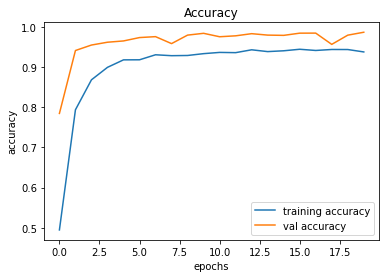

In [37]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

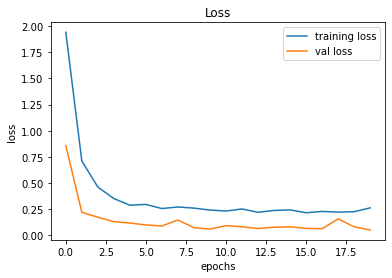

In [38]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

## Save the model

In [78]:
model.save("./training/TSR.h5")

## Load the Model

In [86]:
import os
os.chdir(r'C:/Users/Rahul/Downloads/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [80]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [81]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  End of no passing


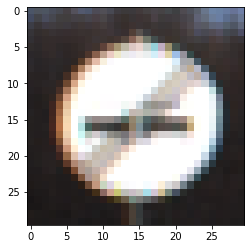

In [91]:
plot,prediction = test_on_img(r'C:\Users\Rahul\Downloads\Traffic_Signs_WebApp-master\Traffic_Signs_WebApp-master\Test\00140.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  No vehicles


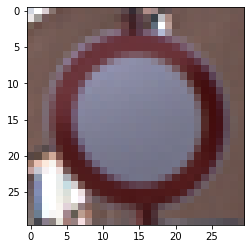

In [92]:
plot,prediction = test_on_img(r'C:\Users\Rahul\Downloads\Traffic_Signs_WebApp-master\Traffic_Signs_WebApp-master\Test\00210.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Stop


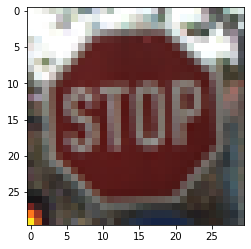

In [107]:
plot,prediction = test_on_img(r'C:\Users\Rahul\Downloads\Traffic_Signs_WebApp-master\Traffic_Signs_WebApp-master\Test\02774.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Roundabout mandatory


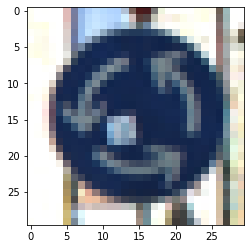

In [99]:
plot,prediction = test_on_img(r'C:\Users\Rahul\Downloads\Traffic_Signs_WebApp-master\Traffic_Signs_WebApp-master\Test\01958.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Priority road


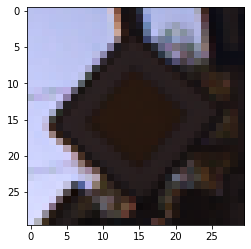

In [100]:
plot,prediction = test_on_img(r'C:\Users\Rahul\Downloads\Traffic_Signs_WebApp-master\Traffic_Signs_WebApp-master\Test\02039.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Right-of-way at intersection


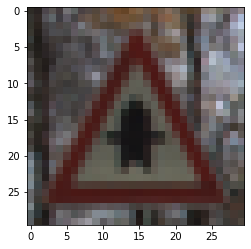

In [101]:
plot,prediction = test_on_img(r'C:\Users\Rahul\Downloads\Traffic_Signs_WebApp-master\Traffic_Signs_WebApp-master\Test\02093.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Double curve


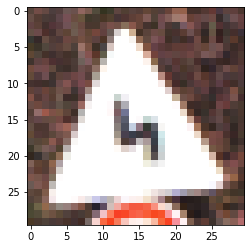

In [103]:
plot,prediction = test_on_img(r'C:\Users\Rahul\Downloads\Traffic_Signs_WebApp-master\Traffic_Signs_WebApp-master\Test\02370.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Beware of ice/snow


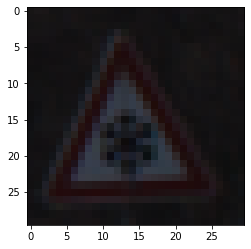

In [104]:
plot,prediction = test_on_img(r'C:\Users\Rahul\Downloads\Traffic_Signs_WebApp-master\Traffic_Signs_WebApp-master\Test\02360.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Road work


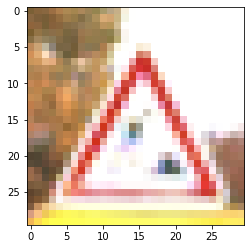

In [105]:
plot,prediction = test_on_img(r'C:\Users\Rahul\Downloads\Traffic_Signs_WebApp-master\Traffic_Signs_WebApp-master\Test\02597.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()